From the error chart before, due to the 2D "symmetry" (I don't actually know what term to use, but essentially the errors are in the same respective locations on the x-axis and y-axis), I had a strong hunch that the logic bug was hidden within the function `inter_1D()` on my `fourier_interpolate_[v].py` library file. 

In [29]:
# from "fourier_interpolate_v4.py"

import numpy as np
from numpy.fft import fft

# x-axis indexes: i
# y-axis indexes: j
# z-axis indexes: k
# fourier term indexes: f

def inter_1D(coords, values, pos):
   """
   returns the one dimensional FFT interpolated value at the given position
   
   Parameters: 
      coords : ArrayLike
         a list or numpy.array of coordinates associated with the value_array
         Example:
         [x0,  x1,  ..., xNi]
      values : ArrayLike
         a list or numpy.array of values associated with the coord_array
         Example:
         [v(x0), v(x1), ..., v(xNi)]
      pos : Float
         A float with the coordinate of the desired interpolated value
         Example: x
   """
   
   Ni = len(values)
   c_max = coords[-1] + coords[1]

   values_fft = fft(values)

   value_inter = np.real(values_fft[0]) / Ni
   for f in range(1, Ni // 2 + 1):
      w = f * 2 * np.pi / c_max
      value_inter += 2 / Ni * np.real(values_fft[f]) * np.cos(w * pos)
      value_inter -= 2 / Ni * np.imag(values_fft[f]) * np.sin(w * pos)

   return value_inter

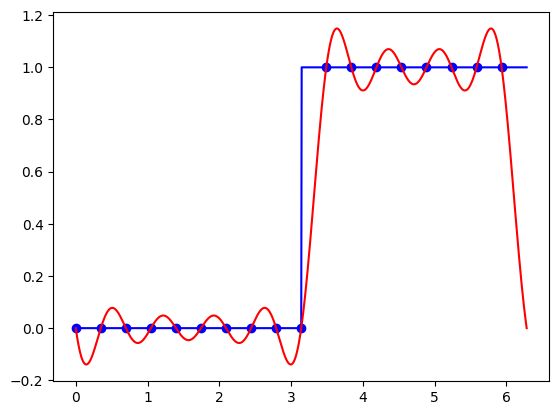

In [30]:
def f(x):
   return 1 if x > np.pi else 0

x = np.linspace(0, 2 * np.pi, 19)[:-1] # [:-1] removes last element of generated list
y = np.zeros(len(x))
for i in range(0, len(x)):
   y[i] = f(x[i])

x_inter = np.linspace(0, 2 * np.pi, 1001)
y_inter = np.zeros(1001)
y_a = np.zeros(1001)

for i in range(0, len(x_inter)):
   y_inter[i] = inter_1D(x, y, x_inter[i])
   y_a[i] = f(x_inter[i])

import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'blue')
plt.plot(x_inter, y_a, color = 'blue')
plt.plot(x_inter, y_inter, color = 'red')
plt.show()

# Checking Identicality:
'''
print("{0:.4f}".format(x_inter[122]))
print("{0:.4f}".format(x_inter[369]))
print("{0:.4f}".format(x_inter[385]))
print("{0:.4f}".format(x_inter[508]))
print("{0:.4f}".format(x_inter[640]))
print("{0:.4f}".format(x_inter[699]))
print("{0:.4f}".format(x_inter[710]))
print("{0:.4f}".format(x_inter[811]))
print("{0:.4f}".format(x_inter[884]))
print("{0:.4f}".format(x_inter[996]))

print("{0:.4f}".format(y_inter[122]))
print("{0:.4f}".format(y_inter[369]))
print("{0:.4f}".format(y_inter[385]))
print("{0:.4f}".format(y_inter[508]))
print("{0:.4f}".format(y_inter[640]))
print("{0:.4f}".format(y_inter[699]))
print("{0:.4f}".format(y_inter[710]))
print("{0:.4f}".format(y_inter[811]))
print("{0:.4f}".format(y_inter[884]))
print("{0:.4f}".format(y_inter[996]))
'''

'''
i     x        v4.2 (i = 0)   MATLAB (i = 1)
122   0.7665   -0.0354        -0.0354
369   2.3185   -0.0530        -0.0530
385   2.4190   -0.0138        -0.0138
508   3.1919   +0.1144        +0.1144
640   4.0212   +0.9125        +0.9125
699   4.3919   +1.0668        +1.0668
710   4.4611   +1.0430        +1.0430
811   5.0957   +1.0675        +1.0675
884   5.5543   +0.9717        +0.9717
996   6.2581   +0.0533        +0.0533
'''; # disables comment being outputted

As can be seen above, we perfectly replicate the original MATLAB example I was given, which at first I couldn't figure out what was going on to cause the issue. However, I realized that we were "preparing" the `coords` and `values` parameters by slicing the last element off with `[:-1]` (which by the way is one reason I prefer Python to MATLAB, as the inline method I used in Line 4 is not possible to accomplish in a single line in MATLAB). When we call this function in 2D, 3D, we don't actually perform this slice. While my alpha versions of this function did try to do something similar to this, I realize now that I was missing one the three lines from below, causing phase and magnitude errors that I "fixed" with what I did above.

```
Ni = len(values) - 1
c_max = coords[-1]
values_fft = fft(values[:-1])
```

In [31]:
# from "ffti_v5.py"
def inter_1D(coords, values, pos):
   """
   returns the one dimensional FFT interpolated value at the given position
   
   Parameters: 
      coords : ArrayLike
         a list or numpy.array of coordinates associated with the value_array
         Example:
         [x0,  x1,  ..., xNi]
      values : ArrayLike
         a list or numpy.array of values associated with the coord_array
         Example:
         [v(x0), v(x1), ..., v(xNi)]
      pos : Float
         A float with the coordinate of the desired interpolated value
         Example: x
   """
   
   Ni = len(values) - 1
   c_max = coords[-1]

   values_fft = fft(values[:-1])

   value_inter = np.real(values_fft[0]) / Ni
   for f in range(1, Ni // 2 + 1):
      w = f * 2 * np.pi / c_max
      value_inter += 2 / Ni * np.real(values_fft[f]) * np.cos(w * pos)
      value_inter -= 2 / Ni * np.imag(values_fft[f]) * np.sin(w * pos)

   return value_inter

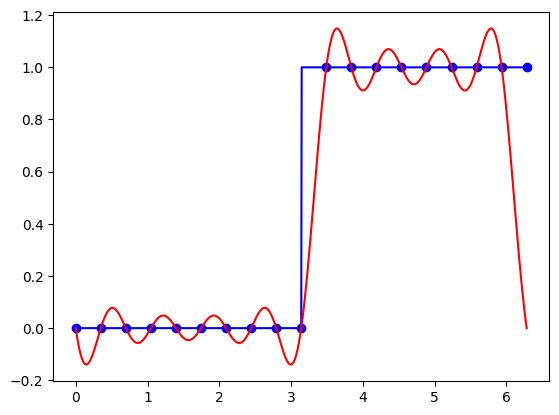

In [32]:
def f(x):
   return 1 if x > np.pi else 0

x = np.linspace(0, 2 * np.pi, 19)
y = np.zeros(len(x))
for i in range(0, len(x)):
   y[i] = f(x[i])

x_inter = np.linspace(0, 2 * np.pi, 1001)
y_inter = np.zeros(1001)
y_a = np.zeros(1001)

for i in range(0, len(x_inter)):
   y_inter[i] = inter_1D(x, y, x_inter[i])
   y_a[i] = f(x_inter[i])

import matplotlib.pyplot as plt
plt.scatter(x, y, color = 'blue')
plt.plot(x_inter, y_a, color = 'blue')
plt.plot(x_inter, y_inter, color = 'red')
plt.show()


Now that we have the function working without external parameter preparation, we can literally just copy paste this and replace our old `inter_1D()` function, and rerun `test_2D v.4.2` as `test_2D v5`, which it is currently running.